Text(0.5, 1.0, 'Noise')

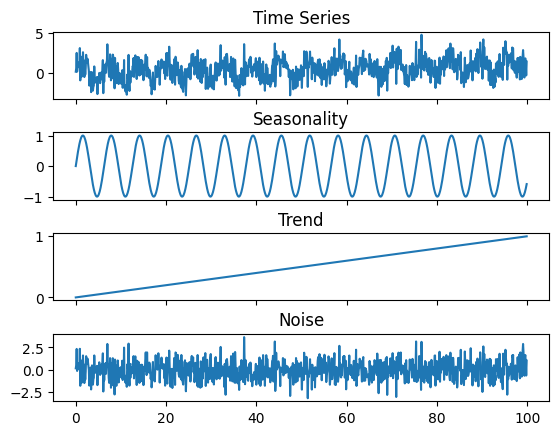

In [71]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 100, .1)
seasonality = np.sin(t)
trend = 0.01*t
noise = np.random.normal(0, 1, len(t))
y = seasonality + trend + noise

fig, axs = plt.subplots(4, 1, sharex=True)
# space between plots
fig.subplots_adjust(hspace=.5)
axs[0].plot(t, y)
axs[0].set_title('Time Series')
axs[1].plot(t, seasonality)
axs[1].set_title('Seasonality')
axs[2].plot(t, trend)
axs[2].set_title('Trend')
axs[3].plot(t, noise)
axs[3].set_title('Noise')


In [72]:
# convert time series from time to frequency domain
from scipy.fftpack import fft
from scipy.stats import entropy

def spectral_entropy(y):
    N = len(y)
    yf = fft(y)
    ps = np.abs(yf[0:N//2])**2
    ps_norm = ps / ps.sum()
    return entropy(ps_norm)

print(spectral_entropy(y))
print(spectral_entropy(seasonality))
print(spectral_entropy(trend))
print(spectral_entropy(trend+seasonality))
print(spectral_entropy(noise))

4.2123124650001325
0.16295967909403775
0.6440384889345607
1.0921150396065444
5.8310435438237045
